In [59]:
%reload_ext autoreload
%autoreload 2

In [60]:
import sys

sys.path.append("/home/Marc/Marc_network_sims")  # path to the code with the functions

## Select a data path + conditions


In [61]:
import pickle

# Specify the path to the .pkl file
file_path = "/home/Marc/Marc_network_sims/data/Data06_Recurrent_connections/gna_0.75_gk_0.75_bwb_bwb_weight_1.00/00.pkl"  # From within ../data/Exp06_Recurrent_connections

# Load the .pkl file
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Now you can use the loaded data in your code
print(data)

{'netParams': {'cellParams': {'Pyr': {'Cell': <class 'SynapticaSims.Cell.Cell.PyrAdr'>, 'nCells': 800, 'xrange': [0, 5], 'yrange': [0, 5], 'zrange': [0, 5]}, 'Bwb': {'Cell': <class 'SynapticaSims.Cell.Cell.Bwb'>, 'nCells': 200, 'xrange': [5, 7], 'yrange': [5, 7], 'zrange': [5, 7]}, 'OLM': {'Cell': <class 'SynapticaSims.Cell.Cell.Ow'>, 'nCells': 200, 'xrange': [5, 7], 'yrange': [5, 7], 'zrange': [5, 7]}}, 'stimParams': {'Pyr 1': {'source': 'NetStim', 'targets': {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,

Data for RC weight 1.0 loaded successfully


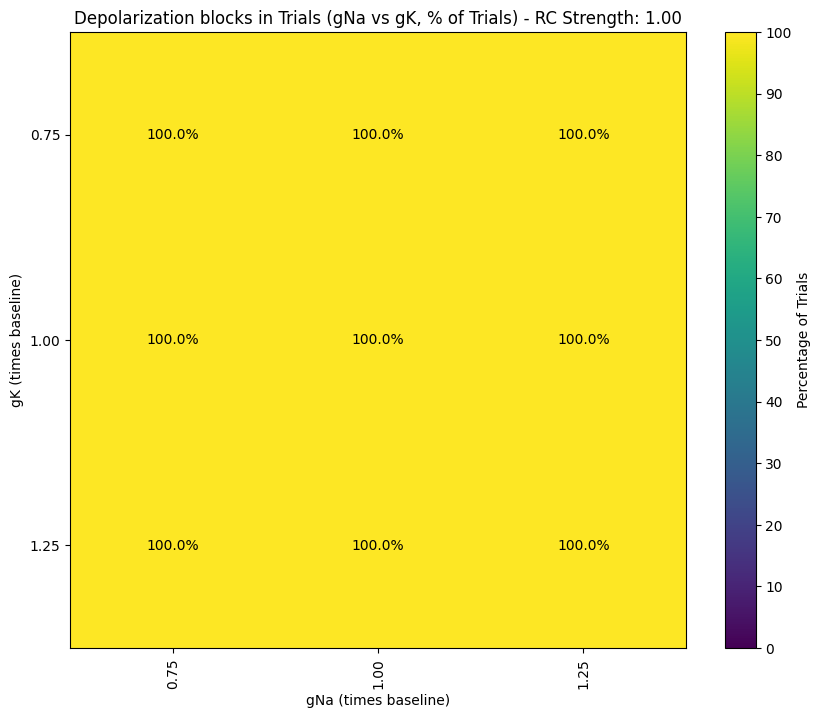

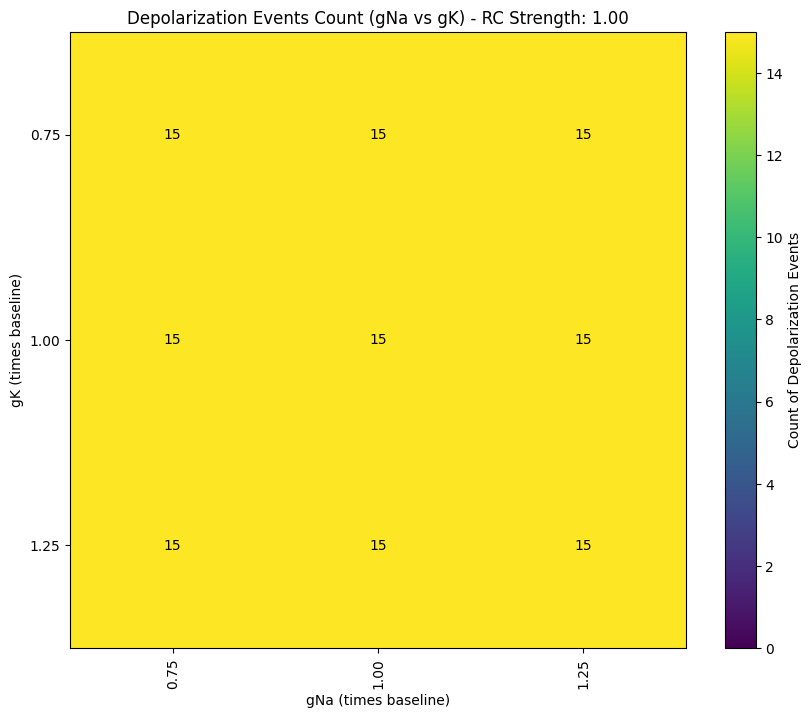

Data for RC weight 1.05 loaded successfully


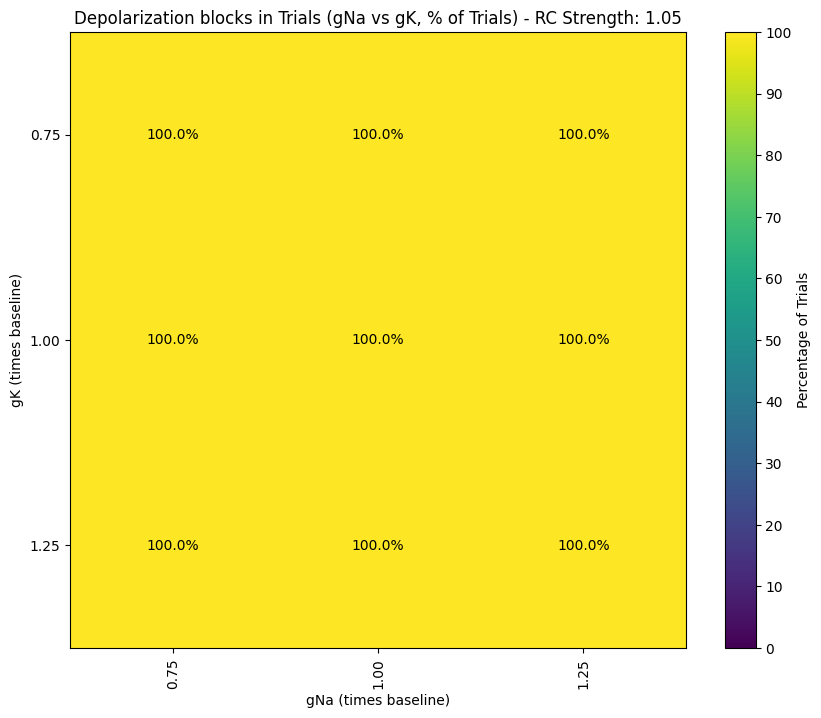

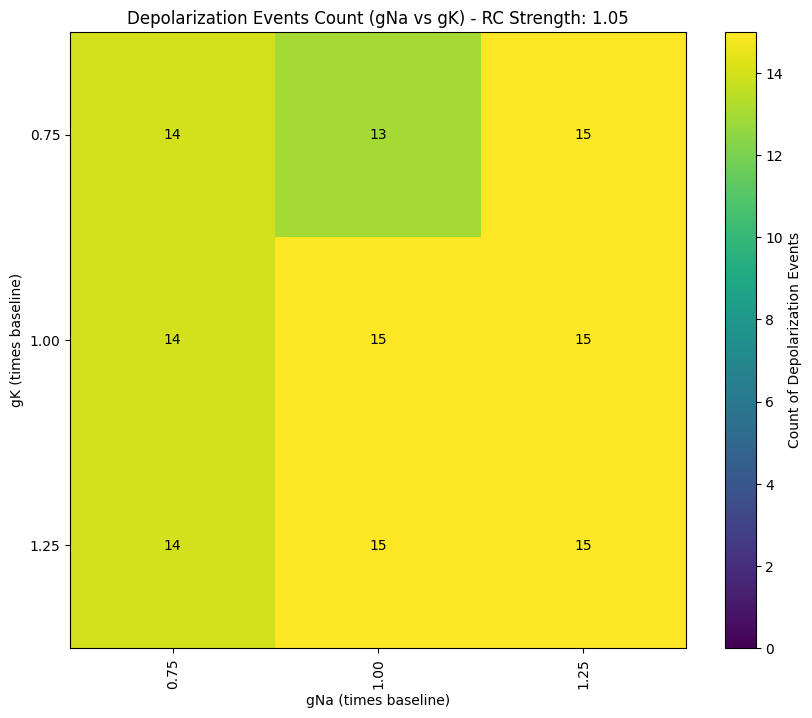

Data for RC weight 1.1 loaded successfully


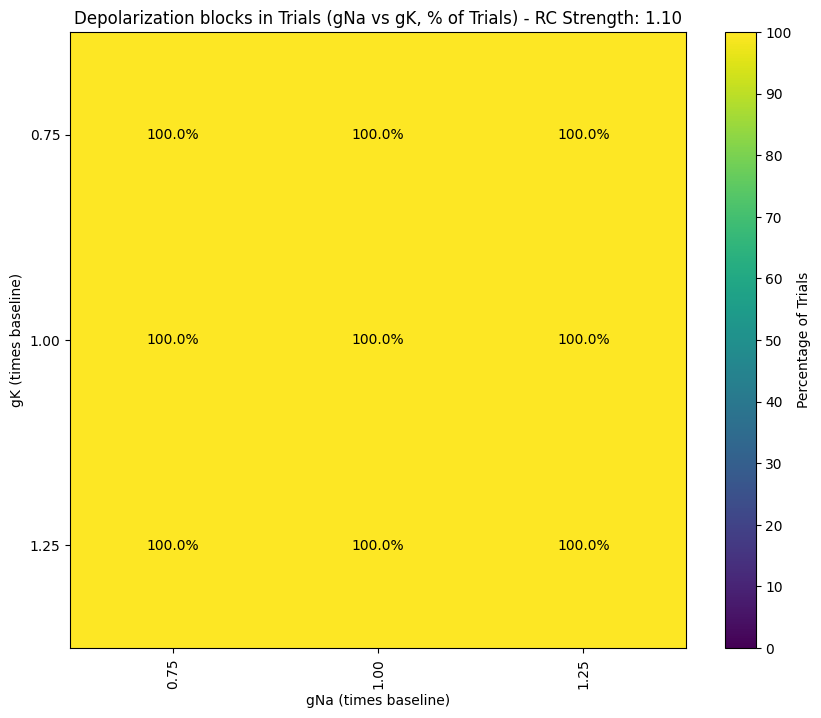

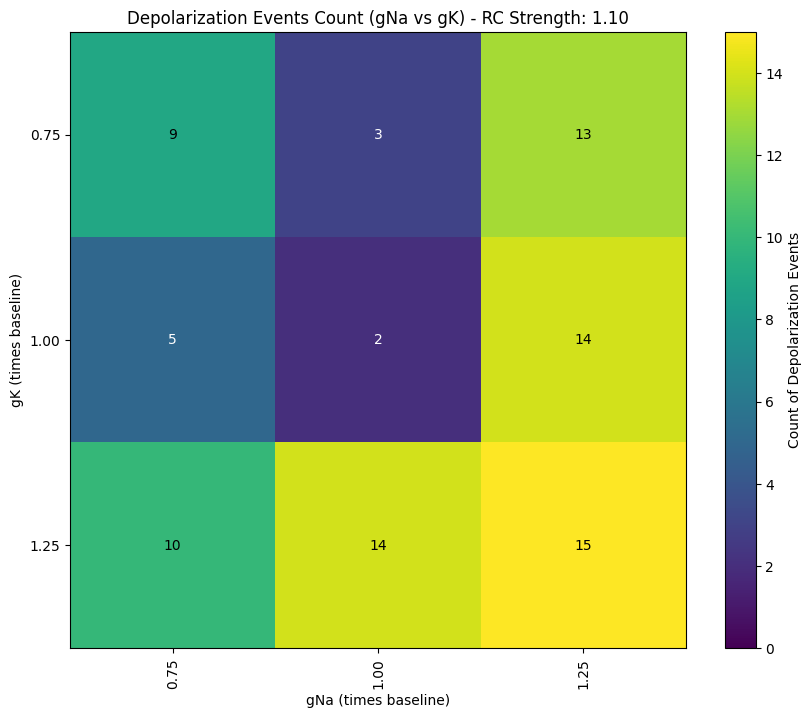

Data for RC weight 1.15 loaded successfully


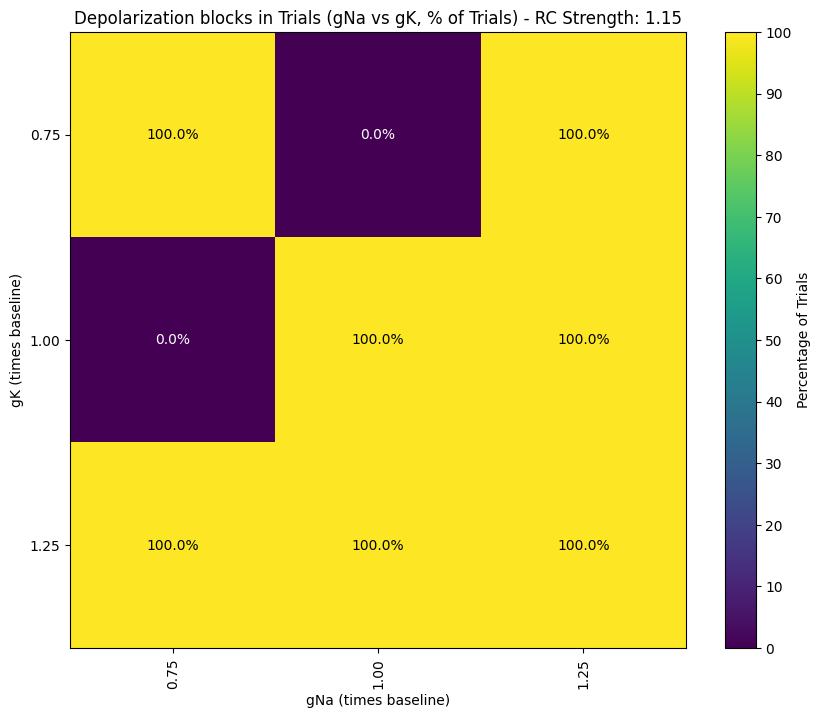

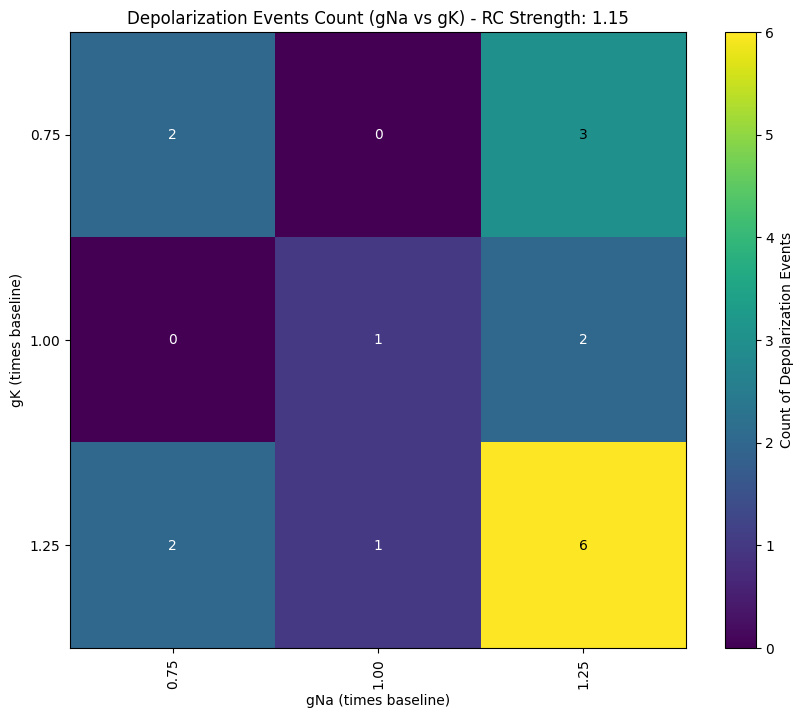

Data for RC weight 1.2 loaded successfully


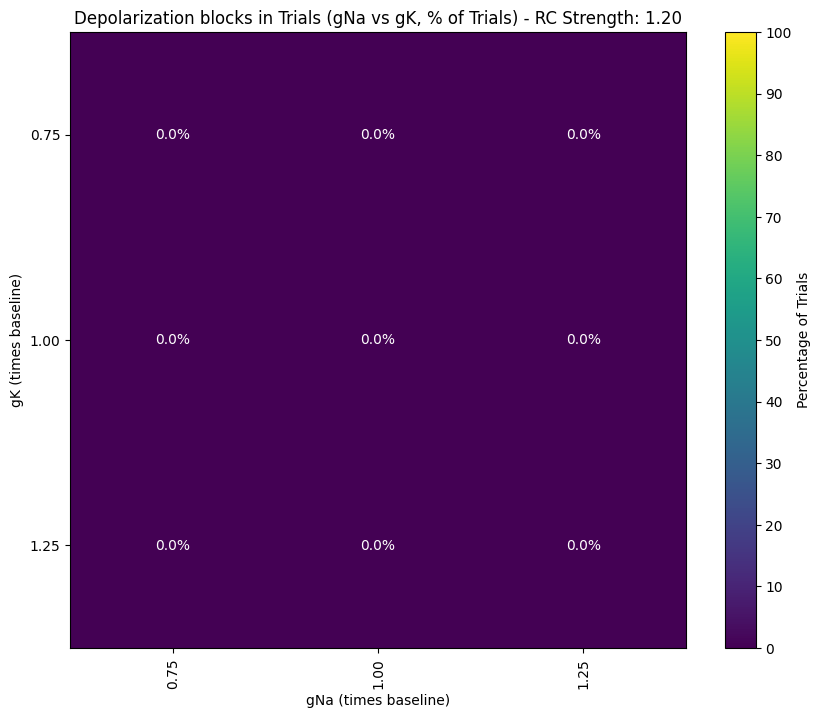

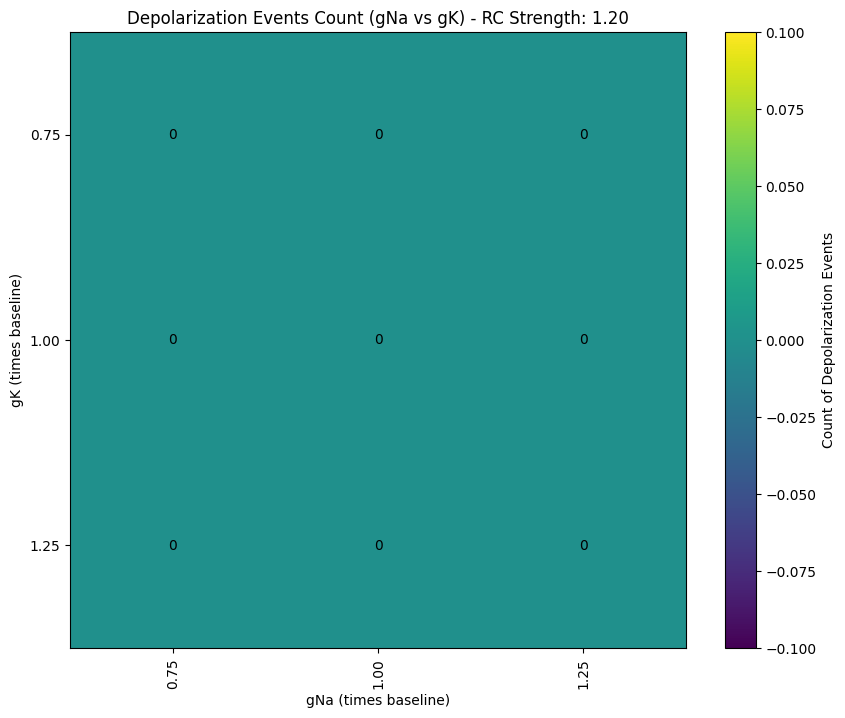

In [62]:
import numpy as np
from src.SanjayCode import analyze_single_RC_strength
from src.SanjayCode import plot_rc_depolarization_percentage_matrix
from src.SanjayCode import plot_rc_depolarization_events_matrix


# gNa and gK values, adjusted for tighter range
gna_values = np.arange(0.75, 1.50, 0.25)
gk_values = np.arange(0.75, 1.50, 0.25)

# Basket cell recurrent connection strength
Bwb_Bwb_weights = np.array([1.00, 1.05, 1.10, 1.15, 1.20])

# Base path to the .pkl files
base_path = "../Results/Recurrent_results/"

# Loop through each RC weight. load the data, analyze it, and plot the matrix
for bwb_weight in Bwb_Bwb_weights:
    pkl_path = f"{base_path}bwb_bwb_weight_{bwb_weight:.2f}.pkl"

    # Load the pickle file
    try:
        with open(pkl_path, "rb") as file:
            results_dict = pickle.load(file)
        print(f"Data for RC weight {bwb_weight} loaded successfully")

        # Analyze the data
        analysis_results = analyze_single_RC_strength(results_dict)

        # Plot the percentage matrix
        plot_rc_depolarization_percentage_matrix(
            analysis_results,
            gna_values,
            gk_values,
            [bwb_weight],  # Pass the RC weight as a list
        )

        # Plot the matrix
        plot_rc_depolarization_events_matrix(
            analysis_results,
            gna_values,
            gk_values,
            [bwb_weight],  # Pass the RC weight as a list
        )

    except Exception as e:
        print(f"Error loading data for RC weight {pkl_path}: {e}")

_1.20 RC connection, does not yield any results as there are no DPBs_


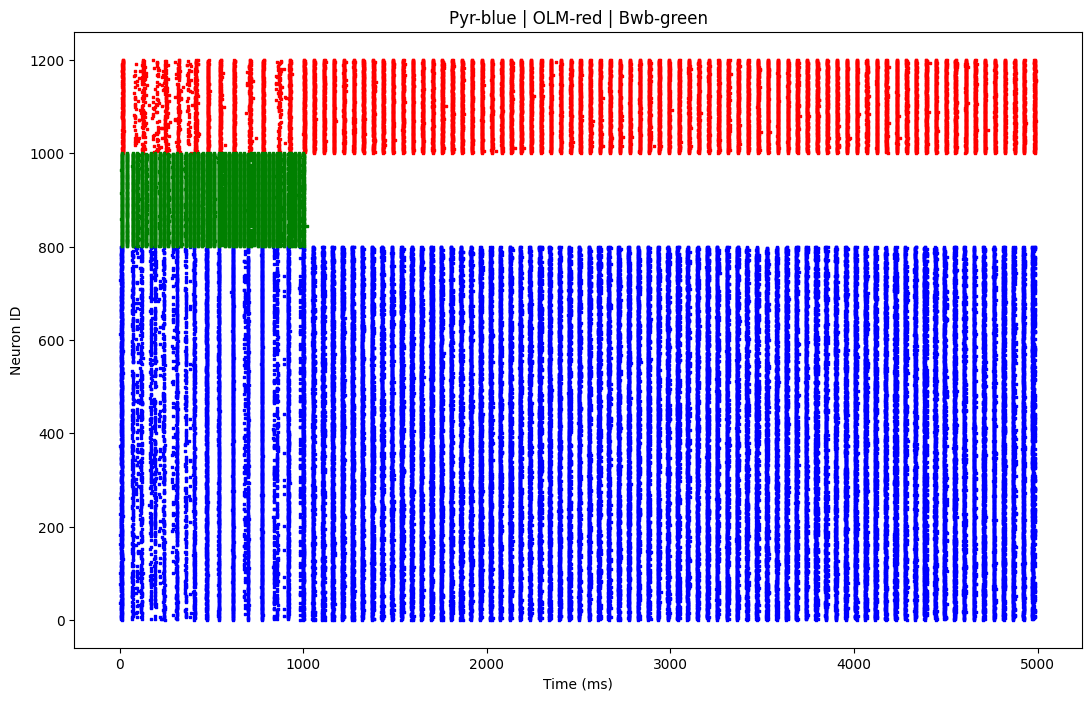

In [63]:
from src.SanjayCode import scatter_plot
import matplotlib.pyplot as plt

# Load the data
with open(
    "/home/Marc/Marc_network_sims/data/Data06_Recurrent_connections/gna_1.00_gk_1.25_bwb_bwb_weight_1.00/00.pkl",
    "rb",
) as file:
    data = pickle.load(file)

scatter_plot(data["simData"])

# plt.xlim(3000, 3200)
# plt.ylim(600, 1400)

In [64]:
# from SynapticaSims import Plotting

# basket_cells = data["simData"]
# Plotting.fast_convolution_threaded(basket_cells, sig_len=50_000, dt=0.1)

Depolarization block from 1076ms to 5000ms, Duration: 3924ms
Total Depolarization Duration: 3924ms


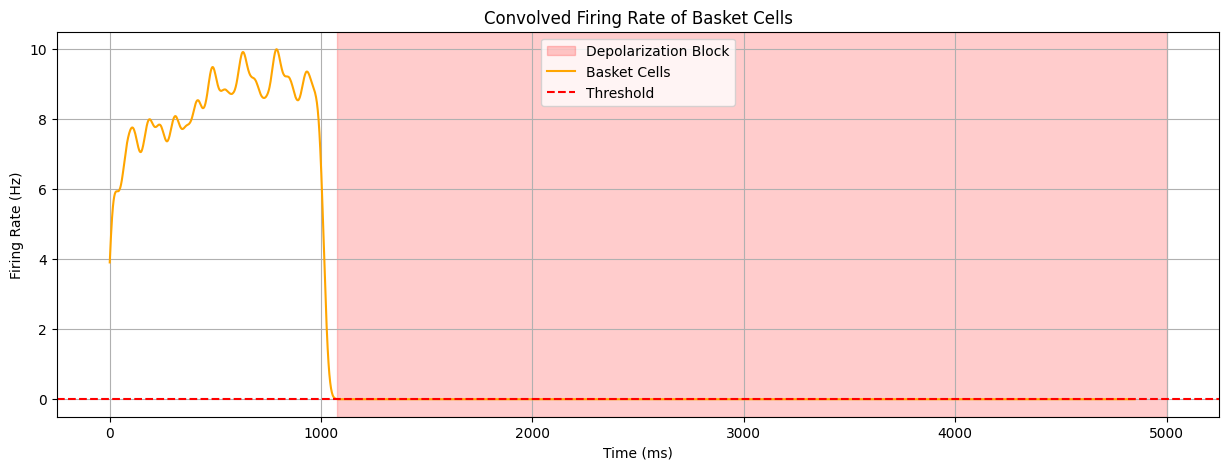

In [65]:
from src.SanjayCode import (
    get_spike_times_for_basket_cells,
    get_convolved_signal_per_neuron,  # New function to get convolved signal per neuron
    detect_depolarization_blocks,
    plot_results,
)

# Example usage
basket_spike_times_list = get_spike_times_for_basket_cells(
    data, 800, 999
)  # Assumes data is defined elsewhere

total_duration = 5000  # in ms

# Apply Gaussian convolution
convolved_signal = get_convolved_signal_per_neuron(
    basket_spike_times_list, total_duration, window_size=150, std=20
)
# Detect depolarization blocks
(
    depolarization_starts,
    depolarization_ends,
    threshold,
    total_depolarization_duration,
) = detect_depolarization_blocks(convolved_signal, total_duration)

# Plot the results
plot_results(
    convolved_signal,
    depolarization_starts,
    depolarization_ends,
    threshold,
    total_duration,
    window_size=150,
)